In [13]:
#importing packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
#import calmap


data_set = pd.read_csv('SanitizedMarijuanaCrimeData.csv')

In [14]:
#top 10 records
data_set.head(10)

#bottom 10 records
data_set.tail(10)

,Unnamed: 0,INCIDENT_ID,FIRST_OCCURENCE_DATE,LAST_OCCURENCE_DATE,REPORTDATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,MJ_RELATION_TYPE,NEIGHBORHOOD_ID
1243,1244,201342812,2013-01-27,2013-01-27,2013-01-27,5100 W 38TH AVE,3125864.0,1705326.0,1,113,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY,west-highland
1244,1245,2013159064,2013-04-09,2013-04-09,2013-04-09,400 S LIPAN ST,3140355.0,1683657.0,4,412,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY,athmar-park
1245,1246,2016603620,2016-09-18,2016-09-18,2016-09-20,2863 LARIMER ST,3145609.0,1702627.0,2,211,2503,FORGERY - COUNTERFEIT OF OBJ,All Other Crimes,INDUSTRY,five-points
1246,1247,2012177207,2012-04-29,2012-04-29,2012-04-29,1211 S QUEBEC WAY,3168208.0,1678222.0,3,322,2202,BURGLARY - RESIDENCE BY FORCE,Burglary,NON-INDUSTRY,washington-virginia-vale
1247,1248,2016693215,2016-10-29,2016-10-29,2016-10-29,4495 N WASHINGTON ST,3146266.0,1708665.0,1,112,2203,BURGLARY - BUSINESS BY FORCE,Burglary,INDUSTRY,globeville
1248,1249,2016611035,2016-09-19,2016-09-19,2016-09-23,1178 S KALAMATH ST,3140643.0,1678536.0,4,422,2399,THEFT - OTHER,Larceny,INDUSTRY,ruby-hill
1249,1250,2016564626,2016-09-03,NaN,2016-09-03,3887 N STEELE ST,3153496.0,1705991.0,2,212,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY,clayton
1250,1251,2016648048,2016-10-08,2016-10-09,2016-10-09,324 S LEYDEN ST,3164614.0,1684229.0,3,321,2399,THEFT - OTHER,Larceny,NON-INDUSTRY,washington-virginia-vale
1251,1252,2016692084,2016-10-28,NaN,2016-10-28,260 N SANTA FE DR,3141128.0,1687684.0,3,311,1202,ROBBERY - BUSINESS,Robbery-Business,INDUSTRY,baker
1252,1253,2014677313,2014-12-22,NaN,2014-12-22,3600 MORRISON RD,3130796.0,1683641.0,4,412,3560,DRUG - MARIJUANA SELL,Drug Offenses,NON-INDUSTRY,westwood


In [15]:
#number of records/data frame size
data_set.shape

(1253, 15)

In [16]:
#dataset variables
list(data_set)

['Unnamed: 0',
 'INCIDENT_ID',
 'FIRST_OCCURENCE_DATE',
 'LAST_OCCURENCE_DATE',
 'REPORTDATE',
 'INCIDENT_ADDRESS',
 'GEO_X',
 'GEO_Y',
 'DISTRICT_ID',
 'PRECINCT_ID',
 'OFFENSE_CODE',
 'OFFENSE_TYPE_ID',
 'OFFENSE_CATEGORY_ID',
 'MJ_RELATION_TYPE',
 'NEIGHBORHOOD_ID']

In [17]:
#key details for the dataset
data_set.describe()

,Unnamed: 0,INCIDENT_ID,GEO_X,GEO_Y,DISTRICT_ID,PRECINCT_ID,OFFENSE_CODE
count,1253.000000,1.253000e+03,1.253000e+03,1.253000e+03,1253.000000,1253.000000,1253.000000
mean,626.542698,2.084097e+09,3.148690e+06,1.691747e+06,2.965682,312.264166,2249.284118
std,362.284367,2.553175e+09,1.480394e+04,1.439970e+04,1.493737,149.334417,754.827045
min,0.000000,2.012277e+07,3.110151e+06,1.654270e+06,1.000000,111.000000,1006.000000
25%,313.000000,2.012412e+09,3.139947e+06,1.679392e+06,2.000000,212.000000,2203.000000
50%,627.000000,2.014233e+09,3.144343e+06,1.692610e+06,3.000000,312.000000,2203.000000
75%,940.000000,2.015515e+09,3.156644e+06,1.705807e+06,4.000000,412.000000,2206.000000
max,1253.000000,2.016601e+10,3.222676e+06,1.730599e+06,7.000000,759.000000,7399.000000


In [30]:
#checking object types and non-null vals
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1253 non-null   int64         
 1   INCIDENT_ID           1253 non-null   int64         
 2   FIRST_OCCURENCE_DATE  1253 non-null   object        
 3   LAST_OCCURENCE_DATE   1000 non-null   datetime64[ns]
 4   REPORTDATE            1253 non-null   object        
 5   INCIDENT_ADDRESS      1253 non-null   object        
 6   GEO_X                 1253 non-null   float64       
 7   GEO_Y                 1253 non-null   float64       
 8   DISTRICT_ID           1253 non-null   int64         
 9   PRECINCT_ID           1253 non-null   int64         
 10  OFFENSE_CODE          1253 non-null   int64         
 11  OFFENSE_TYPE_ID       1253 non-null   object        
 12  OFFENSE_CATEGORY_ID   1253 non-null   object        
 13  MJ_RELATION_TYPE  

In [19]:
#creating a table of crime counts by type
table_offense=pd.crosstab(index=data_set['OFFENSE_CATEGORY_ID'], columns ='count')
print(table_offense)

col_0                       count
OFFENSE_CATEGORY_ID              
Agg ASLT-Firearm               15
Agg ASLT-Other                 18
All Other Crimes               67
Auto Theft                      6
Burglary                      739
Criminal Mischief-Property     78
Criminal Mischief-Vehicle       4
Drug Offenses                  24
Larceny                       125
Robbery-Business               19
Robbery-Street-Res            110
Simple Assault                 18
Theft from Motor Vehicle       28
Weapons Offense                 2


[Text(0.5, 1.0, 'Marijuana Crimes by Offense Category')]

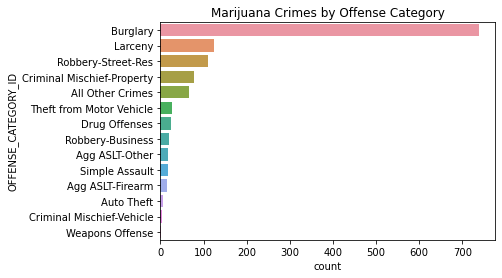

In [20]:
#crime by category
sns.countplot(data=data_set, y="OFFENSE_CATEGORY_ID", order=data_set["OFFENSE_CATEGORY_ID"].value_counts().index).set(title='Marijuana Crimes by Offense Category')

[Text(0.5, 1.0, 'Marijuana Crimes by Relation Type')]

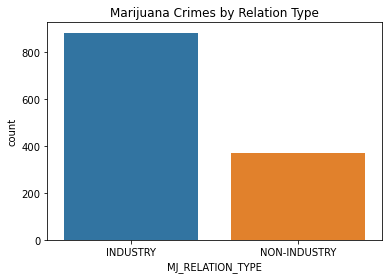

In [21]:
#crime by mj relation type
sns.countplot(data=data_set, x="MJ_RELATION_TYPE", order=data_set["MJ_RELATION_TYPE"].value_counts().index).set(title='Marijuana Crimes by Relation Type')

[Text(0.5, 1.0, 'Marijuana Crimes by Neighborhood')]

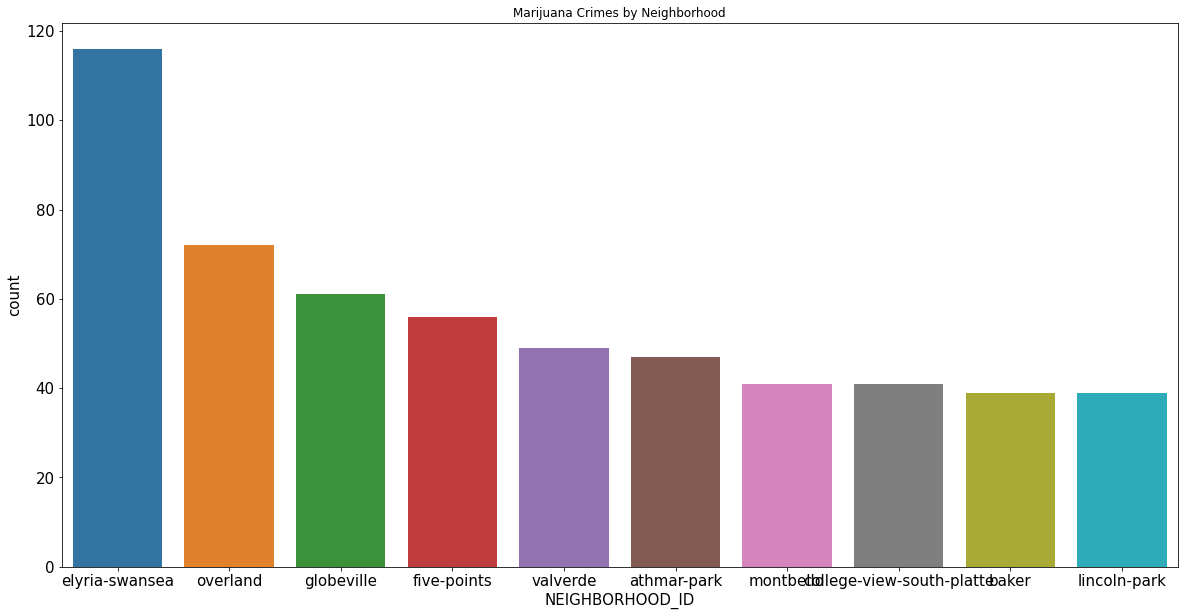

In [22]:
#crime by location
fig = plt.figure(figsize = (20,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Neighborhood',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
sns.countplot(data=data_set, x="NEIGHBORHOOD_ID", order=data_set["NEIGHBORHOOD_ID"].value_counts().iloc[:10].index).set(title='Marijuana Crimes by Neighborhood')


In [31]:
#converting first_occurence_date object type to datetime
data_set['FIRST_OCCURENCE_DATE']=pd.to_datetime(data_set['FIRST_OCCURENCE_DATE'])
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1253 non-null   int64         
 1   INCIDENT_ID           1253 non-null   int64         
 2   FIRST_OCCURENCE_DATE  1253 non-null   datetime64[ns]
 3   LAST_OCCURENCE_DATE   1000 non-null   datetime64[ns]
 4   REPORTDATE            1253 non-null   object        
 5   INCIDENT_ADDRESS      1253 non-null   object        
 6   GEO_X                 1253 non-null   float64       
 7   GEO_Y                 1253 non-null   float64       
 8   DISTRICT_ID           1253 non-null   int64         
 9   PRECINCT_ID           1253 non-null   int64         
 10  OFFENSE_CODE          1253 non-null   int64         
 11  OFFENSE_TYPE_ID       1253 non-null   object        
 12  OFFENSE_CATEGORY_ID   1253 non-null   object        
 13  MJ_RELATION_TYPE  

In [32]:
#creating a table of crime counts by month/year
crimes_by_date=(pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('M'), columns ='count')).sort_index(axis=1)

print(crimes_by_date)


col_0                 count
FIRST_OCCURENCE_DATE       
2012-01                  18
2012-02                  11
2012-03                  27
2012-04                  19
2012-05                  30
2012-06                  21
2012-07                  22
2012-08                  22
2012-09                  16
2012-10                  19
2012-11                  11
2012-12                  15
2013-01                  18
2013-02                  20
2013-03                  15
2013-04                  18
2013-05                  18
2013-06                  17
2013-07                  21
2013-08                  23
2013-09                  29
2013-10                  19
2013-11                  19
2013-12                  29
2014-01                  21
2014-02                  25
2014-03                  24
2014-04                  21
2014-05                  21
2014-06                  25
2014-07                  21
2014-08                  28
2014-09                  19
2014-10             

[Text(0.5, 1.0, 'Marijuana Crimes by Occurrence Date')]

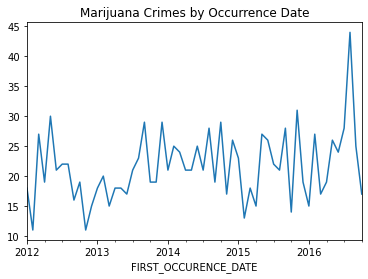

In [33]:
#crime occurrences by date
crimes_by_date.plot(kind='line', legend=False).set(title='Marijuana Crimes by Occurrence Date')

[Text(0.5, 1.0, 'Marijuana Crimes by Occurrence Date')]

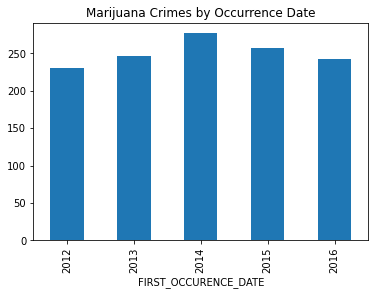

In [90]:
#crime occurrences by date
crimes_by_date_year=(pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('Y'), columns ='count'))
crimes_by_date_year.plot(kind='bar', legend=False).set(title='Marijuana Crimes by Occurrence Date')

AttributeError: 'NoneType' object has no attribute 'set'

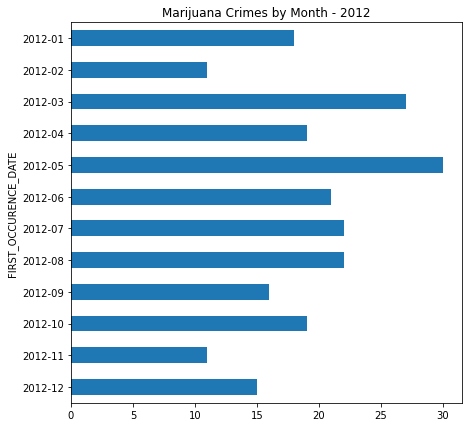

In [126]:
#crime occurrences by date 2012
crimes_by_date_year=(pd.crosstab(index=data_set_2012['FIRST_OCCURENCE_DATE'].dt.to_period('M'), columns ='count'))
crimes_by_date_year.plot(kind='barh', legend=False, sort_columns=False, title='Marijuana Crimes by Month - 2012', figsize=(7,7)).invert_yaxis().set(title='Marijuana Crimes by Occurrence Date')

In [ ]:
#crime over time
crimes_by_industry_date=pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('Y'), columns=data_set['MJ_RELATION_TYPE'])
plot_industry=crimes_by_industry_date.plot(kind='barh',stacked=True,sort_columns=False).invert_yaxis().set(title='Marijuana Crimes by Relation Type and Date')


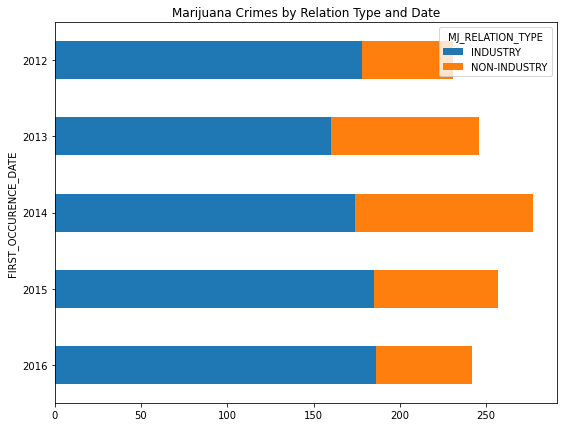

In [121]:
#crime by date and industry
crimes_by_industry_date=pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('Y'), columns=data_set['MJ_RELATION_TYPE'])
plot_industry=crimes_by_industry_date.plot(kind='barh',stacked=True,sort_columns=False, figsize=(9,7), title='Marijuana Crimes by Relation Type and Date').invert_yaxis()
title='Marijuana Crimes by Relation Type and Date'


In [97]:
#crime by date and industry 2012 only
data_set_2012 = data_set[(data_set['FIRST_OCCURENCE_DATE'] < '2013-01-01')]
crimes_by_industry_date=pd.crosstab(index=data_set_2012['FIRST_OCCURENCE_DATE'].dt.to_period('M'), columns=data_set['MJ_RELATION_TYPE'])
plot_industry=crimes_by_industry_date.plot(kind='barh',stacked=True,sort_columns=False).invert_yaxis().set(title='Marijuana Crimes by Relation Type and Date').axhline('FIRST_OCCURENCE_DATE'='2012-09-01', color= 'green', linewidth=2)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2956637825.py, line 4)

[Text(0.5, 1.0, 'Marijuana Crimes by Offense Category and Date')]

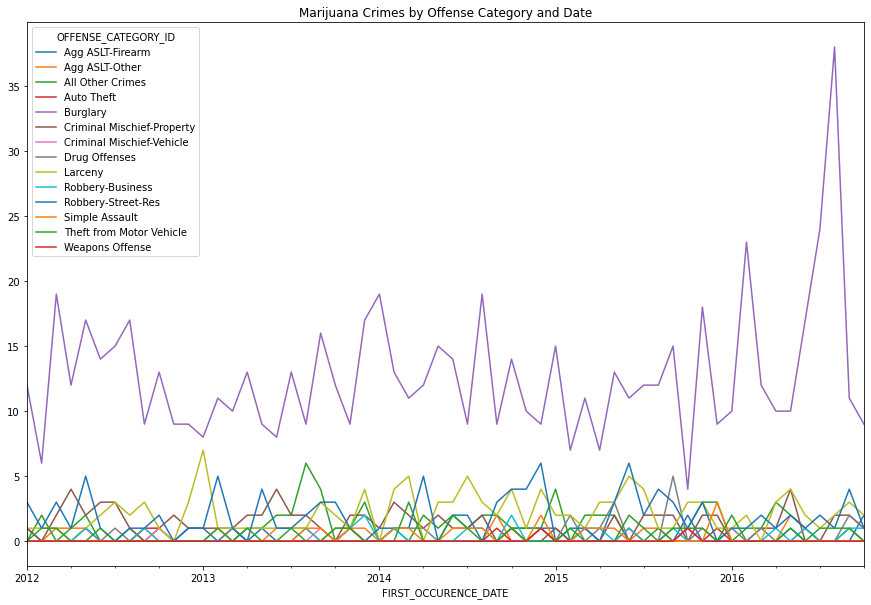

In [35]:
#pandas timeseries amount of incidents by date and type

crimes_by_type_date=pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('M'), columns=data_set['OFFENSE_CATEGORY_ID'])

crimes_by_type_date.plot(kind='line', figsize=(15,10)).set(title='Marijuana Crimes by Offense Category and Date')


<AxesSubplot:xlabel='FIRST_OCCURENCE_DATE'>

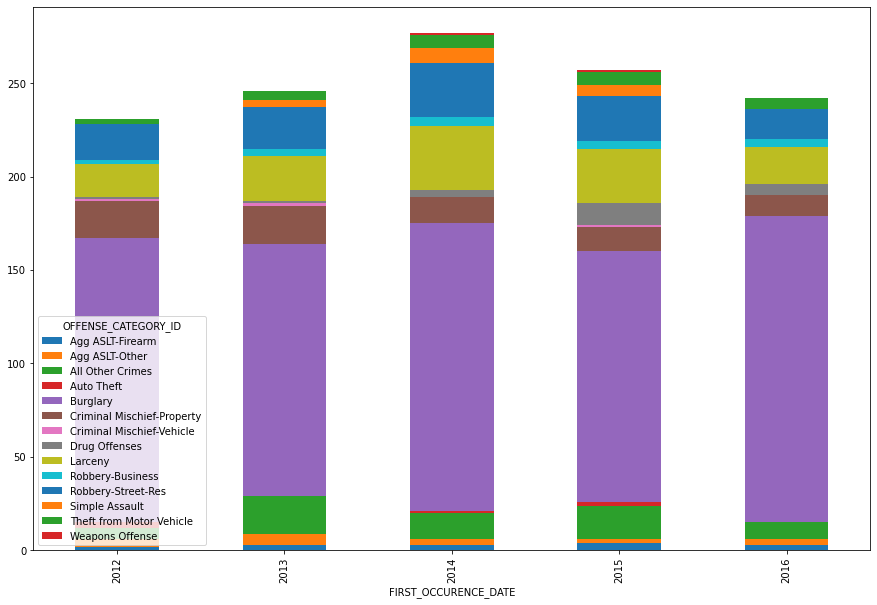

In [81]:
#pandas timeseries amount of incidents by date and type

crimes_by_type_date=pd.crosstab(index=data_set['FIRST_OCCURENCE_DATE'].dt.to_period('Y'), columns=data_set['OFFENSE_CATEGORY_ID'])

crimes_by_type_date.plot(kind='bar', stacked=True,figsize=(15,10))#.set(title='Marijuana Crimes by Offense Category and Date')

<AxesSubplot:xlabel='FIRST_OCCURENCE_DATE'>

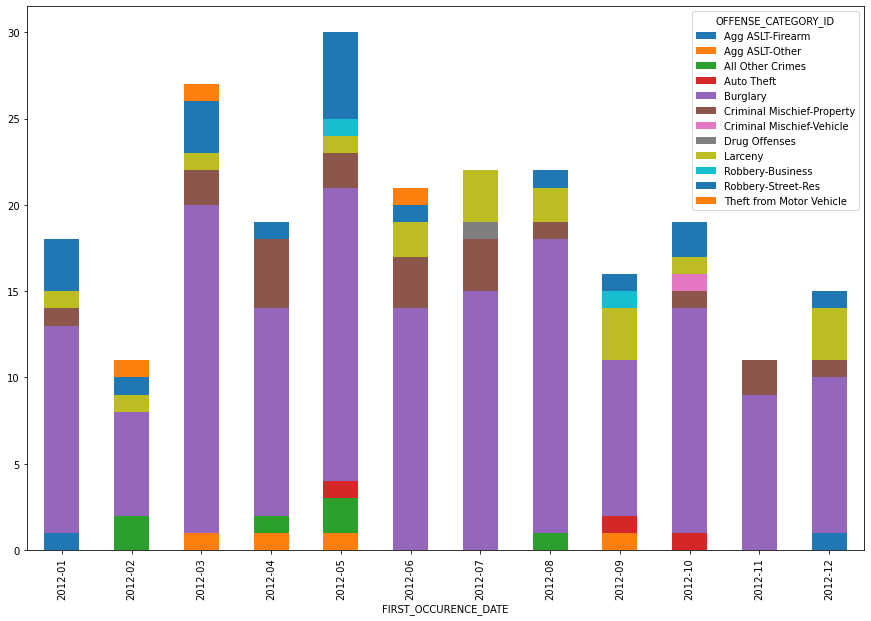

In [84]:
#pandas timeseries amount of incidents by date and type 2012

crimes_by_type_date=pd.crosstab(index=data_set_2012['FIRST_OCCURENCE_DATE'].dt.to_period('M'), columns=data_set['OFFENSE_CATEGORY_ID'])

crimes_by_type_date.plot(kind='bar', stacked=True,figsize=(15,10))#.set(title='Marijuana Crimes by Offense Category and Date')

C:\Users\omare\AppData\Local\Temp\ipykernel_13680\3687996809.py:52: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combinedIncomeGroups =  combined[1:].groupby('Income_Group').mean()


Text(0, 0.5, 'Number of Incidents')

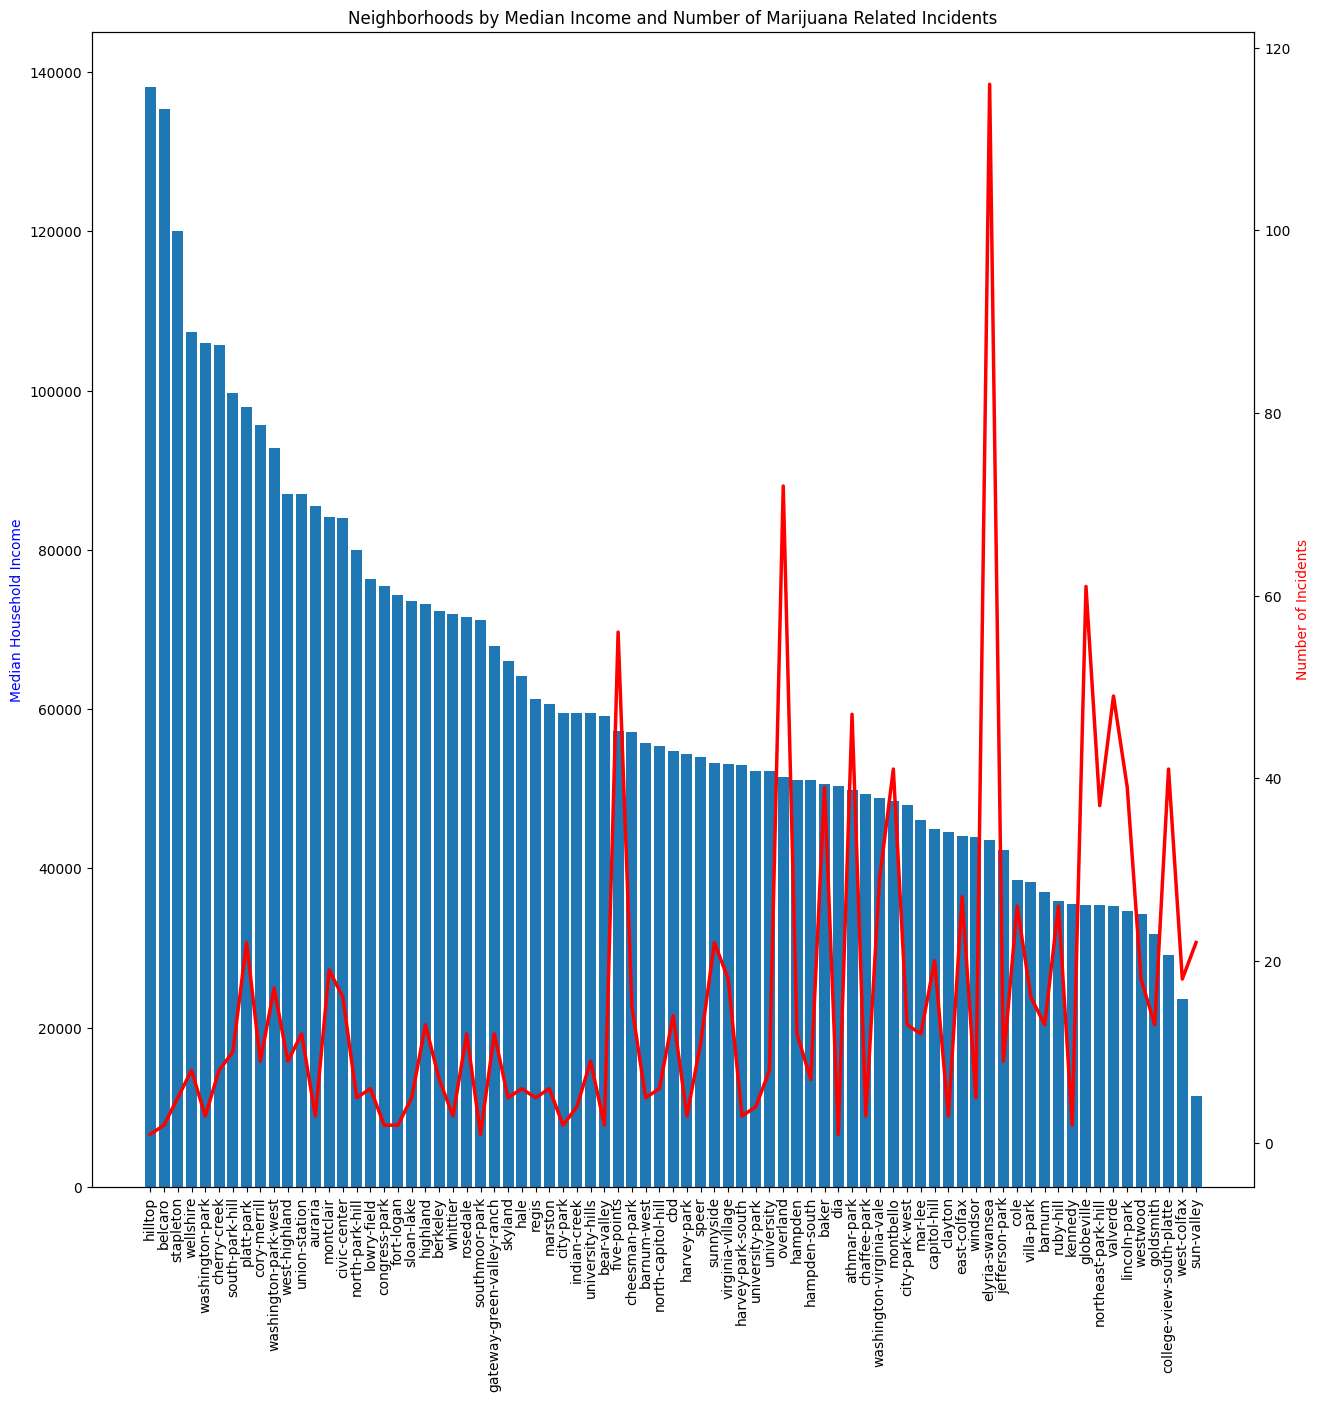

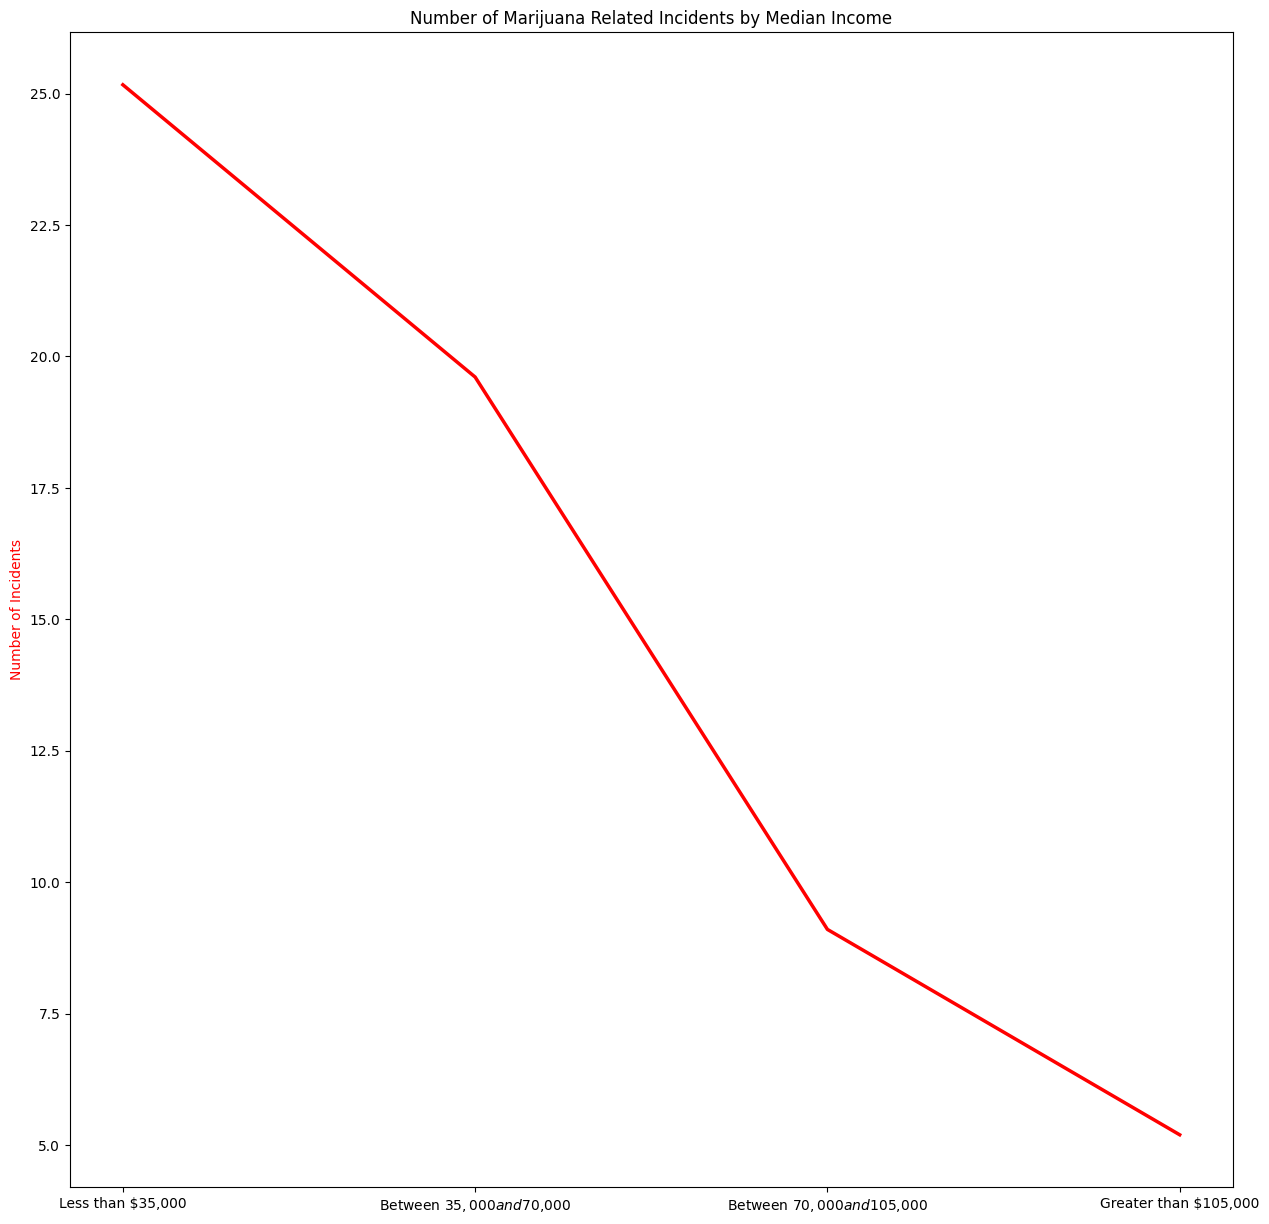

In [4]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt

%matplotlib inline

SanitizedData = pd.read_csv('SanitizedMarijuanaCrimeData.csv', index_col = False)
incomes = pd.read_csv('MedianHouseholdIncome.csv', index_col = False)

SanitizedData.head()
SanitizedData = SanitizedData.drop('Unnamed: 0',axis = 1)

SanitizedData.set_index('INCIDENT_ID')
SanitizedData.NEIGHBORHOOD_ID.value_counts().rename_axis('Neighborhood')

#merge both datasets
main = SanitizedData.NEIGHBORHOOD_ID.value_counts().rename_axis('Neighborhood').reset_index(name='counts')
combined = pd.merge(main,incomes, on = 'Neighborhood',how = 'left')

#Make appropriate replacements
combined['Median Income'] = combined['Median Income'].str.strip('$')
combined['Median Income'] = combined['Median Income'].str.strip(' ')
combined['Median Income'] = combined['Median Income'].str.replace(',','')
combined['Median Income'] = combined['Median Income'].astype('float')

combined = combined.sort_values('Median Income',ascending = False)

#initial plot
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.bar(combined.Neighborhood,combined['Median Income'])
ax.tick_params(axis="x", rotation = 90)
ax2 = ax.twinx()
ax2.plot(combined.Neighborhood,combined['counts'], color = "red", linewidth = 2.5)
ax.set_title('Neighborhoods by Median Income and Number of Marijuana Related Incidents')
ax.set_ylabel('Median Household Income', color ='b')
ax2.set_ylabel('Number of Incidents',color = 'r')

#group data for 2nd plot
def groupNeighborhoods(var):
    if var['Median Income'] < 35000:
        return "Less than $35,000"
    elif var['Median Income'] < 70000:
        return "Between $35,000 and $70,000"
    elif var['Median Income'] < 105000:
        return "Between $70,000 and $105,000"
    elif var['Median Income'] >= 105000:
        return "Greater than $105,000"

combined['Income_Group'] = combined.apply(groupNeighborhoods,axis = 1)

combinedIncomeGroups =  combined[1:].groupby('Income_Group').mean()
combinedIncomeGroups = combinedIncomeGroups.rename_axis('Income_Group').reset_index()
combinedIncomeGroups = combinedIncomeGroups.sort_values('Median Income')

#plot second graph

fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.plot(combinedIncomeGroups.Income_Group,combinedIncomeGroups['counts'], color = "red", linewidth = 2.5)
ax.set_title('Number of Marijuana Related Incidents by Median Income')
ax.set_ylabel('Number of Incidents', color ='r')